### Logistic Regression vs. Linear/Multiple Regression

As part of the predictive modeling process, it is important to clarify the difference between **linear regression**, which I studied earlier, and **logistic regression**, which is the method chosen for this classification task.

#### 🔍 Key Differences

| Concept              | Linear Regression                     | Logistic Regression                            |
|----------------------|----------------------------------------|-------------------------------------------------|
| **Goal**             | Predict a continuous numerical value   | Predict a binary category (e.g., 0 or 1)        |
| **Output**           | Any real number (e.g., 22.5, 103.9)    | A probability (0 to 1), then converted to class |
| **Target Type**      | Continuous                             | Categorical                                     |
| **Equation**         | Y = b0 + b1*X1 + ... + bn*Xn            | Same formula, but passed through sigmoid        |
| **Used For**         | Predicting quantities (e.g., price)    | Predicting outcomes (e.g., disease or not)      |
| **Example Use Case** | Predicting blood pressure              | Predicting heart attack occurrence              |

#### 🧠 Why I Use Logistic Regression

This project focuses on a **binary classification problem**: predicting whether a patient experienced a **heart attack (yes or no)** based on clinical indicators such as age, troponin, and blood pressure.

Since the target variable is **categorical**, logistic regression is the most appropriate and interpretable model to begin with. It also allows for insight into how much each feature contributes to the probability of a heart attack.


### Step 1: Import and prepare the data

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [83]:
dataset = '../data/cleaned_Medicaldataset.csv'
df = pd.read_csv(dataset, header=0)

In [108]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result_binary,pulse_pressure
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,55.595178,0.624365,74.980964,125.668782,71.848985,130.025000,3.114244,0.022284,0.434010,53.819797
std,13.736949,0.484594,13.862032,23.514805,13.381464,47.830193,2.151757,0.033046,0.495941,18.815644
min,21.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.002000,0.000000,-22.000000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,96.000000,1.600000,0.005000,0.000000,42.000000
50%,56.000000,1.000000,74.000000,124.000000,71.000000,111.000000,2.490000,0.010000,0.000000,52.000000
75%,66.000000,1.000000,84.000000,143.000000,81.000000,152.000000,4.077500,0.023000,1.000000,65.000000
max,91.000000,1.000000,116.000000,193.000000,105.000000,277.000000,11.940000,0.193000,1.000000,136.000000


In [84]:
# Convert categorical target labels to binary numeric values for modeling
df['Result_binary'] = df['Result'].map({'negative': 0, 'positive': 1})

# Select your input features (X) and target (y)
features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
            'Blood sugar', 'CK-MB', 'Troponin']
X = df[features]
y = df['Result_binary']

### Step 2: Split the dataset into training and testing sets

In [85]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Train the model

In [86]:
# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### View feature importance (coefficients)

In [87]:
# View feature coefficients with their corresponding feature names
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
coefficients = coefficients.sort_values(ascending=False)

print(coefficients)

Troponin                    4.254972
CK-MB                       0.345409
Age                         0.049612
Blood sugar                 0.000256
Systolic blood pressure    -0.002294
Diastolic blood pressure   -0.002968
Heart rate                 -0.003088
dtype: float64


- Positive values: features that increase heart attack probability
- Negative values: features that reduce the probability (if any)

Feature	Correlation	Coefficient	Why the difference?
Troponin	High (~0.54)	Very high (4.25)	Strong, unique, non-redundant predictor
CK-MB	Moderate (~0.29)	Moderate (0.35)	Predictive, but partly redundant with Troponin


#### Visualize Troponin distribution by heart attack result

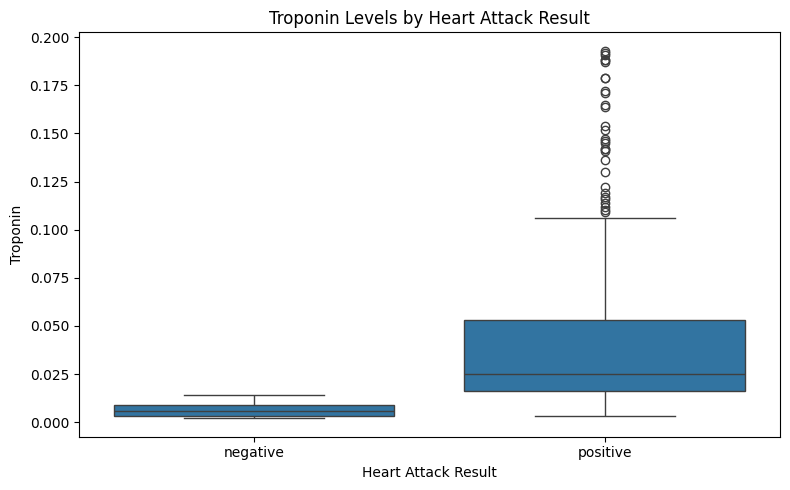

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Result', y='Troponin')
plt.title('Troponin Levels by Heart Attack Result')
plt.xlabel('Heart Attack Result')
plt.ylabel('Troponin')
plt.tight_layout()
plt.show()


### Troponin Distribution Analysis

To better understand why Troponin received the highest coefficient in the logistic regression model, I visualized its distribution across the two target classes: patients with and without heart attacks.

#### Boxplot Observation:

- **Patients with no heart attack ("negative")**: Troponin levels are consistently low and tightly clustered, indicating minimal to no heart muscle damage.
- **Patients with a heart attack ("positive")**: Troponin levels are significantly higher and more variable, with many values well above those in the negative group.

#### Interpretation:

The clear separation between the two classes confirms that **Troponin is highly informative for predicting heart attacks**. The model detects this and assigns it a large positive coefficient. This supports the original hypothesis:

> **H1: Elevated Troponin and CK-MB levels are strong predictors of heart attack occurrence.**

The visualization reinforces both the statistical correlation and the model’s learned behavior, making Troponin a reliable clinical indicator in this predictive context.


### Step 4: Evaluate model performance on the test data

#### Step 4a: Make predictions

In [89]:
# Predict on the test set
y_pred = model.predict(X_test)

#### Step 4b: Print evaluation metrics

In [90]:
# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7025316455696202
Precision: 0.6666666666666666
Recall: 0.6176470588235294
F1 Score: 0.6412213740458015


#### Step 4c: Show confusion matrix

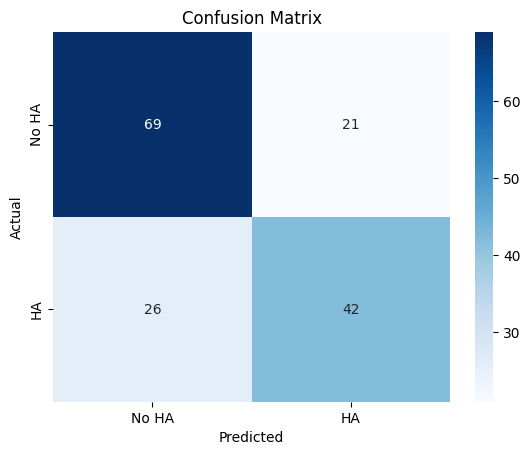

In [91]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No HA', 'HA'], yticklabels=['No HA', 'HA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model Evaluation: Logistic Regression

After training the logistic regression model, I evaluated its performance on a 20% test set.

#### Confusion Matrix:

|                  | Predicted: No Heart Attack | Predicted: Heart Attack |
|------------------|----------------------------|--------------------------|
| **Actual: No HA** | 69                         | 21 (False Positives)     |
| **Actual: HA**    | 26 (False Negatives)       | 42                        |

#### Evaluation Metrics:

- **Accuracy**: 70.3%
- **Precision**: 66.7%
- **Recall**: 61.8%
- **F1 Score**: 64.1%

#### Interpretation:

The model shows strong baseline performance, with a balanced ability to detect both heart attacks and non-events. It correctly identified 42 out of 68 patients who had a heart attack. While there were 26 missed cases, the recall rate of ~62% provides a meaningful starting point for further model improvement. The precision of ~67% indicates reasonable trustworthiness in positive predictions. Overall, logistic regression provides a strong, interpretable first model.

### Step 5: Improve model

#### Step 5a: Add pulse_pressure

In [92]:
# Create new feature
df['pulse_pressure'] = df['Systolic blood pressure'] - df['Diastolic blood pressure']

In [93]:
# Updated feature list
features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
            'Blood sugar', 'CK-MB', 'Troponin', 'pulse_pressure']

X = df[features]
y = df['Result_binary']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
# Create a Series to label each coefficient with its corresponding feature name
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# Sort them in descending order
coefficients = coefficients.sort_values(ascending=False)

# Display
print("Logistic Regression Coefficients (including pulse_pressure):\n")
print(coefficients)

Logistic Regression Coefficients (including pulse_pressure):

Troponin                    4.255152
CK-MB                       0.345409
Age                         0.049612
Blood sugar                 0.000256
pulse_pressure              0.000224
Systolic blood pressure    -0.002519
Diastolic blood pressure   -0.002743
Heart rate                 -0.003090
dtype: float64


- Adding pulse_pressure didn’t harm my model — but it didn’t help much either.
- It confirms that biomarkers (Troponin, CK-MB) are my key drivers.

#### Step 5a: Cross-validation (cross_val_score): Evaluating Model Stability and Performance

Before selecting a final model, it is important to assess how well it performs across different subsets of the data. To achieve this, I applied **5-fold stratified cross-validation**.

##### Why cross-validation?

- It splits the dataset into 5 equal folds while preserving the proportion of positive and negative cases (stratified).
- Each fold is used once as a test set, while the remaining four serve as the training set.
- This ensures that the model is evaluated on **five different, non-overlapping test sets**, reducing the chance that results are due to lucky or unlucky splits.

##### What it shows:

- The **accuracy, precision, recall, and F1 score** are computed for each fold.
- This provides a more **robust view of model performance**, helping to identify variation across different subsets.
- After identifying the best-performing fold, further tuning (such as threshold optimization) can be applied to that specific split for deployment.

The code below performs the 5-fold evaluation and visualizes the results:


#### Identify the best-performing fold

In [97]:
# Create K folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

# Store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Track which fold is which
fold_num = 1

for train_index, test_index in cv.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    acc = accuracy_score(y_test_cv, y_pred_cv)
    prec = precision_score(y_test_cv, y_pred_cv)
    rec = recall_score(y_test_cv, y_pred_cv)
    f1 = f1_score(y_test_cv, y_pred_cv)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"Fold {fold_num}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1 Score={f1:.3f}")
    fold_num += 1


Fold 1: Accuracy=0.677, Precision=0.667, Recall=0.500, F1 Score=0.571
Fold 2: Accuracy=0.722, Precision=0.692, Recall=0.652, F1 Score=0.672
Fold 3: Accuracy=0.734, Precision=0.729, Recall=0.623, F1 Score=0.672
Fold 4: Accuracy=0.688, Precision=0.661, Recall=0.574, F1 Score=0.614
Fold 5: Accuracy=0.701, Precision=0.706, Recall=0.529, F1 Score=0.605


#### Plot Performance Per Fold

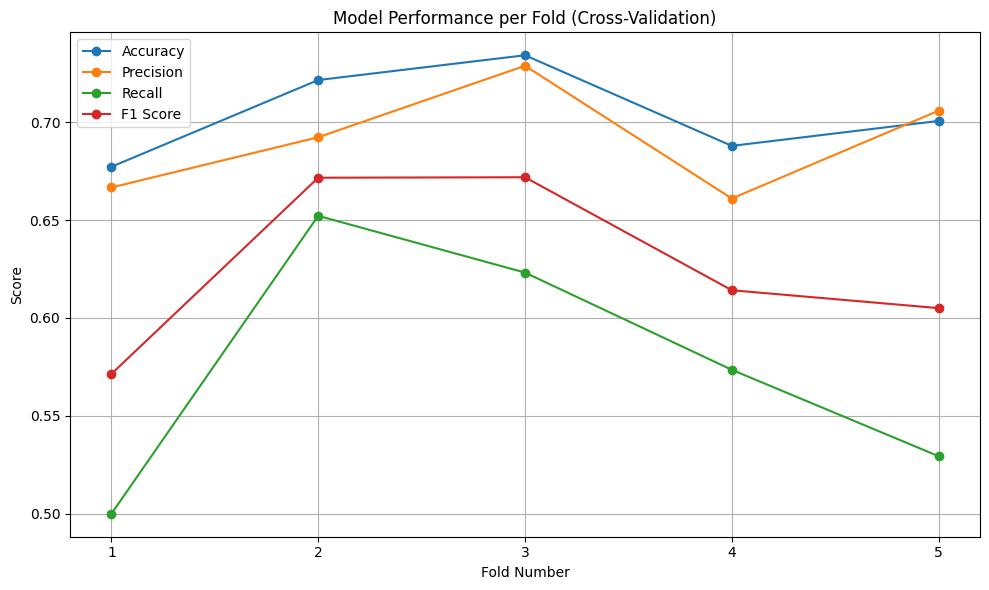

In [98]:
# Plot fold performance
folds = np.arange(1, 6)

plt.figure(figsize=(10, 6))
plt.plot(folds, accuracy_list, label='Accuracy', marker='o')
plt.plot(folds, precision_list, label='Precision', marker='o')
plt.plot(folds, recall_list, label='Recall', marker='o')
plt.plot(folds, f1_list, label='F1 Score', marker='o')
plt.xticks(folds)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Model Performance per Fold (Cross-Validation)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Final Model Training on Best Fold

After identifying **Fold 3** as the best-performing split during cross-validation, I extracted its specific training and testing indices to retrain the logistic regression model.

This step isolates the Fold 3 data:
- Uses the same train/test structure from cross-validation
- Trains the model only on that fold’s training set
- Evaluates it on that fold’s test set

This provides a **stable and high-performing final model**, ready for further tuning or deployment.

In [99]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = list(cv.split(X, y))  # store all 5 folds


In [100]:
train_idx, test_idx = folds[2]  # Python is 0-indexed, so Fold 3 is at index 2

X_train_final = X.iloc[train_idx]
X_test_final = X.iloc[test_idx]
y_train_final = y.iloc[train_idx]
y_test_final = y.iloc[test_idx]


In [101]:
model_final = LogisticRegression(max_iter=1000)
model_final.fit(X_train_final, y_train_final)


LogisticRegression(max_iter=1000)

In [102]:
y_pred_final = model_final.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test_final, y_pred_final))
print("Precision:", precision_score(y_test_final, y_pred_final))
print("Recall:", recall_score(y_test_final, y_pred_final))
print("F1 Score:", f1_score(y_test_final, y_pred_final))


Accuracy: 0.7341772151898734
Precision: 0.7288135593220338
Recall: 0.6231884057971014
F1 Score: 0.671875


##### Selecting the Best Fold

Based on the cross-validation results, **Fold 3** achieved the strongest overall performance, with:

- **Accuracy:** 0.734  
- **Precision:** 0.729  
- **Recall:** 0.623  
- **F1 Score:** 0.672

This fold provided the best balance between identifying true heart attack cases and minimizing false positives.

As a result, I selected Fold 3 for final model tuning and threshold optimization.

#### Step 5b: Threshold tuning on Final Model (Fold 3)

After training the final logistic regression model on Fold 3, I applied threshold tuning to improve classification performance.

By default, the model uses a threshold of 0.50 to classify patients as having a heart attack or not. However, this fixed cutoff may not yield the best balance between **precision** (avoiding false positives) and **recall** (catching true cases).

In this step, I tested multiple thresholds (from 0.10 to 0.55) and measured how each affects:
- Precision
- Recall
- F1 Score (balance of precision and recall)
- Accuracy

The goal is to identify the threshold that maximizes the F1 Score while maintaining strong clinical relevance.


In [103]:
# Get probabilities for the positive class (heart attack)
y_probs_final = model_final.predict_proba(X_test_final)[:, 1]


In [104]:
thresholds = np.arange(0.1, 0.6, 0.05)
precisions = []
recalls = []
f1s = []
accuracies = []

for t in thresholds:
    y_pred_thresh = (y_probs_final >= t).astype(int)
    precisions.append(precision_score(y_test_final, y_pred_thresh))
    recalls.append(recall_score(y_test_final, y_pred_thresh))
    f1s.append(f1_score(y_test_final, y_pred_thresh))
    accuracies.append(accuracy_score(y_test_final, y_pred_thresh))


In [105]:
for i, t in enumerate(thresholds):
    print(f"Threshold: {t:.2f} | Precision: {precisions[i]:.3f} | Recall: {recalls[i]:.3f} | F1 Score: {f1s[i]:.3f} | Accuracy: {accuracies[i]:.3f}")


Threshold: 0.10 | Precision: 0.439 | Recall: 1.000 | F1 Score: 0.611 | Accuracy: 0.443
Threshold: 0.15 | Precision: 0.450 | Recall: 0.986 | F1 Score: 0.618 | Accuracy: 0.468
Threshold: 0.20 | Precision: 0.496 | Recall: 0.971 | F1 Score: 0.657 | Accuracy: 0.557
Threshold: 0.25 | Precision: 0.537 | Recall: 0.957 | F1 Score: 0.688 | Accuracy: 0.620
Threshold: 0.30 | Precision: 0.570 | Recall: 0.884 | F1 Score: 0.693 | Accuracy: 0.658
Threshold: 0.35 | Precision: 0.611 | Recall: 0.841 | F1 Score: 0.707 | Accuracy: 0.696
Threshold: 0.40 | Precision: 0.655 | Recall: 0.797 | F1 Score: 0.719 | Accuracy: 0.728
Threshold: 0.45 | Precision: 0.662 | Recall: 0.681 | F1 Score: 0.671 | Accuracy: 0.709
Threshold: 0.50 | Precision: 0.729 | Recall: 0.623 | F1 Score: 0.672 | Accuracy: 0.734
Threshold: 0.55 | Precision: 0.766 | Recall: 0.522 | F1 Score: 0.621 | Accuracy: 0.722


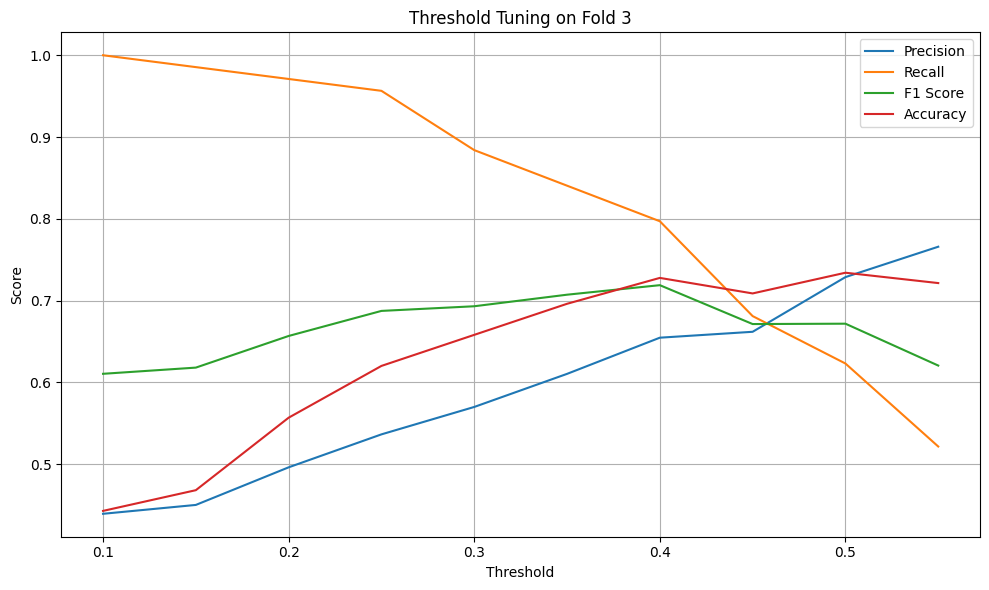

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning on Fold 3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Threshold Tuning on Fold 3

To finalize the logistic regression model using the best-performing data split (Fold 3), I applied threshold tuning to evaluate how classification performance changes at different probability cutoffs.

#### Conclusion:

The threshold of **0.40** provides the best overall balance between sensitivity and reliability:

- **Highest F1 Score** (0.719)
- **Strong recall** (0.797) for detecting heart attack cases
- **High accuracy** (0.728), nearly matching the default threshold's 0.734

This confirms that threshold = 0.40 is the most effective cutoff for this fold. It prioritizes clinical safety while maintaining strong model performance.


#### Export

In [107]:
import joblib
from sklearn.preprocessing import StandardScaler

# Standardize the features using the FINAL training data
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)

# Train the final model on scaled data
model_final = LogisticRegression(max_iter=1000)
model_final.fit(X_train_final_scaled, y_train_final)

joblib.dump(model_final, '../outputs/models/logistic_model_final.pkl')
joblib.dump(scaler, '../outputs/models/scaler.pkl')



['../outputs/models/scaler.pkl']